# Do prices correlate with how it is received by players?
With the recent trend of video games now costing $70, many players are being put off playing a game due to the price. Although how much does a price affect a players enjoyment of the game. Which is why I am going to analyze the relationship between the price of a game and how it is rated by the players (how many people rated the game positively vs negatively). 

# Getting info on data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83560 entries, 0 to 83559
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       83560 non-null  int64  
 1   Name                        83554 non-null  object 
 2   Release date                83560 non-null  object 
 3   Estimated owners            83560 non-null  object 
 4   Peak CCU                    83560 non-null  int64  
 5   Required age                83560 non-null  int64  
 6   Price                       83560 non-null  float64
 7   DLC count                   83560 non-null  int64  
 8   About the game              80123 non-null  object 
 9   Supported languages         83560 non-null  object 
 10  Full audio languages        83560 non-null  object 
 11  Reviews                     9716 non-null   object 
 12  Header image                83560 non-null  object 
 13  Website                     390

In [2]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


For this analysis, we are only interested in the name, positive, negative, and price column. Of course some games would have significantly more players compared to others. Thus rather than comparing the numbers directly, I believe it would make more sense to compare the positve and negative ratios of each game. 

In [3]:
price_ratings = df[['Name','Positive', 'Negative', 'Price']]

total = []
pos_ratio = []
neg_ratio = []
for i, j in zip(price_ratings.Positive, price_ratings.Negative):
    tot = i + j
    if tot != 0:
        pos = i / tot
        neg = j / tot
    else:
        pos = 0
        neg = 0
    
    total.append(tot)
    pos_ratio.append(pos)
    neg_ratio.append(neg)
    
price_ratings['Total ratings'] = total
price_ratings['Positive ratio'] = pos_ratio
price_ratings['Negative ratio'] = neg_ratio

price_ratings.head()

C:\Users\benja\AppData\Local\Temp\ipykernel_8736\3115699253.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_ratings['Total ratings'] = total
C:\Users\benja\AppData\Local\Temp\ipykernel_8736\3115699253.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_ratings['Positive ratio'] = pos_ratio
C:\Users\benja\AppData\Local\Temp\ipykernel_8736\3115699253.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Name,Positive,Negative,Price,Total ratings,Positive ratio,Negative ratio
0,Galactic Bowling,6,11,19.99,17,0.352941,0.647059
1,Train Bandit,53,5,0.99,58,0.913793,0.086207
2,Jolt Project,0,0,4.99,0,0.000000,0.000000
3,Henosis™,3,0,5.99,3,1.000000,0.000000
4,Two Weeks in Painland,50,8,0.00,58,0.862069,0.137931


To get a better sense of the data, I think it would be interesting to see what the average total ratings are. 

In [4]:
mean = price_ratings['Total ratings'].mean()
std = price_ratings['Total ratings'].std()
print('Mean: ', mean)
print('Std: ', std)
print('Total: ', price_ratings.shape[0])

Mean:  1138.5725586404978
Std:  28347.313646676197
Total:  83560


The average amount of ratings a game receives is around 1138 but with a standard deviation of 28347. This tells me that a good chunk of these games do not recieve many ratings, while some games are well over hundreds of thousands ratings. To keep our results accurate, I will limit our analysis to games with at least 500 ratings. I believe 500 ratings means the game has a sizeable player base, and any smaller means the ratios might be skewed. 

# Clean up

In [5]:
cleaned = price_ratings.loc[(price_ratings['Total ratings'] >= 500)]
cleaned.sort_values(by=['Total ratings'])

,Name,Positive,Negative,Price,Total ratings,Positive ratio,Negative ratio
52511,FPV.SkyDive : FPV Drone Racing & Freestyle Sim...,398,102,0.00,500,0.796000,0.204000
6937,Air Conflicts: Pacific Carriers,264,236,9.99,500,0.528000,0.472000
52200,STEINS;GATE: Linear Bounded Phenogram,489,11,0.00,500,0.978000,0.022000
78227,Chernobyl Commando,114,386,0.00,500,0.228000,0.772000
9470,18+,332,168,0.99,500,0.664000,0.336000
...,...,...,...,...,...,...,...
8256,Tom Clancy's Rainbow Six® Siege,929372,138530,19.99,1067902,0.870278,0.129722
57205,Grand Theft Auto V,1171197,210154,0.00,1381351,0.847863,0.152137
17585,Dota 2,1477153,300437,0.00,1777590,0.830986,0.169014
8885,PUBG: BATTLEGROUNDS,1154655,895978,0.00,2050633,0.563072,0.436928


Looks like many games don't acheive even 500 ratings, as we went from 83560 games to just 7963 games, but hopefully this will give a more accurate representation of player's reception to games. 

Next, I will be dividing the games into bins based on their prices. bin0 being for free games, bin1 for games that are 10 dollars and under, bin2 for 20 dollars games and under, and so on. The last bin, bin7, are for the more expensive games that are above 60 dollars. 

# Bins

In [6]:
bin0 = cleaned.loc[cleaned['Price'] == 0]
bin1 = cleaned.loc[(cleaned['Price'] > 0) & (cleaned['Price'] <= 10)]
bin2 = cleaned.loc[(cleaned['Price'] > 10) & (cleaned['Price'] <= 20)]
bin3 = cleaned.loc[(cleaned['Price'] > 20) & (cleaned['Price'] <= 30)]
bin4 = cleaned.loc[(cleaned['Price'] > 30) & (cleaned['Price'] <= 40)]
bin5 = cleaned.loc[(cleaned['Price'] > 40) & (cleaned['Price'] <= 50)]
bin6 = cleaned.loc[(cleaned['Price'] > 50) & (cleaned['Price'] <= 60)]
bin7 = cleaned.loc[(cleaned['Price'] > 60)]

In [7]:
print(bin0.shape[0])
print(bin1.shape[0])
print(bin2.shape[0])
print(bin3.shape[0])
print(bin4.shape[0])
print(bin5.shape[0])
print(bin6.shape[0])
print(bin7.shape[0])

1455
2729
2323
828
317
128
157
26


Looks like the vast majority of games are between the cheaper end, being between 0 to 20 dollars. Which does makes sense as more people would be able to afford the cheaper games compared to the more expensive ones. This shouldn't affect the results too much as we are primarily seeing the ratios of how positively or negatively rated a game is at each price point.

The below function will calculate how many games have higher positive ratios vs higher negative ratios. I will make a distinction between positive and overwhelmingly positve. Where positive is between %50 to %80 and overwhelmingly positive is above %80. Same thing will apply to negative ratios. As games with 60% positve ratings, although technically means the majority of players recieved the game well, there is a significant portion of players who did not enjoy the game as much. While a 80% positive ratings tells us that the vast majority of players enjoyed the game, espically much more compared to the 60% ones. 

In [8]:
posList = []
overPosList = []
negList = []
overNegList = []

def ratings_calc(data):
    pos_count = data.loc[(data['Positive ratio'] >= 0.5) & (data['Positive ratio'] < 0.8)].shape[0]
    very_pos_count = data.loc[data['Positive ratio'] >= 0.8].shape[0]
    neg_count = data.loc[(data['Negative ratio'] >= 0.5) & (data['Negative ratio'] < 0.8)].shape[0]
    very_neg_count = data.loc[data['Negative ratio'] >= 0.8].shape[0]
    
    pos_perc = pos_count / data.shape[0]
    very_pos_perc = very_pos_count / data.shape[0]
    neg_perc = neg_count / data.shape[0]
    very_neg_perc = very_neg_count / data.shape[0]
    
    posList.append(pos_perc)
    overPosList.append(very_pos_perc)
    negList.append(neg_perc)
    overNegList.append(very_neg_perc)
    
    print(f'Positive rated games:              {pos_count}')
    print(f'Overwhelming Positive rated games: {very_pos_count}')
    print(f'Negative rated games:              {neg_count}')
    print(f'Overwhelming Negative rated games: {very_neg_count}')
    print(f'Total games in this bin:           {data.shape[0]}')

In [9]:
print("Ratings of free games")
ratings_calc(bin0)

Ratings of free games
Positive rated games:              638
Overwhelming Positive rated games: 739
Negative rated games:              77
Overwhelming Negative rated games: 1
Total games in this bin:           1455


In [10]:
print("Ratings of $10 games")
ratings_calc(bin1)

Ratings of $10 games
Positive rated games:              820
Overwhelming Positive rated games: 1803
Negative rated games:              99
Overwhelming Negative rated games: 7
Total games in this bin:           2729


In [11]:
print("Ratings of $20 games")
ratings_calc(bin2)

Ratings of $20 games
Positive rated games:              638
Overwhelming Positive rated games: 1641
Negative rated games:              42
Overwhelming Negative rated games: 2
Total games in this bin:           2323


In [12]:
print("Ratings of $30 games")
ratings_calc(bin3)

Ratings of $30 games
Positive rated games:              247
Overwhelming Positive rated games: 558
Negative rated games:              20
Overwhelming Negative rated games: 3
Total games in this bin:           828


In [13]:
print("Ratings of $40 games")
ratings_calc(bin4)

Ratings of $40 games
Positive rated games:              122
Overwhelming Positive rated games: 184
Negative rated games:              9
Overwhelming Negative rated games: 2
Total games in this bin:           317


In [14]:
print("Ratings of $50 games")
ratings_calc(bin5)

Ratings of $50 games
Positive rated games:              49
Overwhelming Positive rated games: 76
Negative rated games:              3
Overwhelming Negative rated games: 0
Total games in this bin:           128


In [15]:
print("Ratings of $60 games")
ratings_calc(bin6)

Ratings of $60 games
Positive rated games:              59
Overwhelming Positive rated games: 90
Negative rated games:              8
Overwhelming Negative rated games: 0
Total games in this bin:           157


In [16]:
print("Ratings of very expensive games")
ratings_calc(bin7)

Ratings of very expensive games
Positive rated games:              9
Overwhelming Positive rated games: 8
Negative rated games:              7
Overwhelming Negative rated games: 2
Total games in this bin:           26


# Visualization
Will display data using bar graph. Rather than using the direct number of games, I will use percentages.

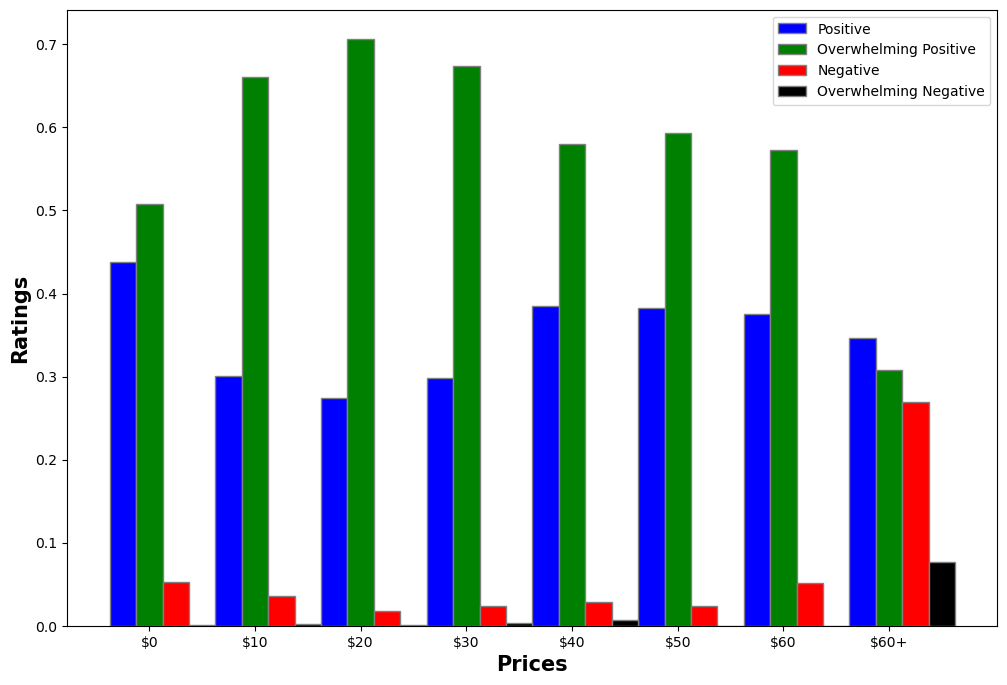

In [17]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(posList)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, posList, color ='blue', width = barWidth, 
        edgecolor ='grey', label ='Positive') 
plt.bar(br2, overPosList, color ='green', width = barWidth, 
        edgecolor ='grey', label ='Overwhelming Positive') 
plt.bar(br3, negList, color ='red', width = barWidth, 
        edgecolor ='grey', label ='Negative') 
plt.bar(br4, overNegList, color='black', width = barWidth,
       edgecolor ='grey', label = "Overwhelming Negative")
 
# Adding Xticks 
plt.xlabel('Prices', fontweight ='bold', fontsize = 15) 
plt.ylabel('Ratings', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(posList))], 
        ['$0', '$10', '$20', '$30', '$40', '$50', '$60', '$60+'])
 
plt.legend()
plt.show() 

# Conclusions
From the data we can see that for each price point, the vast majority of games are rated highly. With nearly every price point having more overwhelming positive ratings compared to positive ratings. And with the two positive rating columns combined, they significantly out pacing the negative reviews. The most interesting price point to look into are the games priced more than 60 dollars, i.e. the 70 dollar games. At this price point we see more games as rated positively rather than overwhelmingly positive. In addition, negatively rated games make a greater portion of the 70 dollar games and is almost on par to the positive rated games. 

Considering how we see the same trend at nearly every price point, we can assume that prices do not have any correlation or large impact on a games reception with its players. Although the $60+ price point may say otherwise, but that bin does not have as much data compared to the other bins. And considering the raising of game prices is fairly new, the data in that bin could grow and we could see different results a year from now. 